In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import sklearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [16]:
df=pd.read_csv("new_dataframe_1.csv")
#df1=0:350, 80 20-acc1
#df2=350:454- accu2
X_train_df = df.drop(['diagnosis'], axis=1)
y_train_df= df['diagnosis']
df.describe(include='all')


,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KU,KV,KY,KZ,LA,LD,LE,LF,LG,diagnosis
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,...,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,46.277027,0.551802,166.191441,68.027027,89.022523,154.765766,366.943694,169.896396,89.716216,33.788288,...,33.071847,-0.298423,-0.276126,9.038514,-1.463063,0.515541,1.250225,19.301126,29.678378,3.880631
std,16.507535,0.497870,37.485610,16.655294,15.459535,45.096176,33.200859,35.686092,25.901805,45.729949,...,24.412159,0.604290,0.531081,3.439845,2.015255,0.348174,1.417060,13.487314,18.517302,4.402614
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,141.000000,350.000000,148.000000,79.000000,3.750000,...,16.100000,-0.500000,-0.500000,6.600000,-2.100000,0.400000,0.600000,11.500000,17.775000,1.000000
50%,46.000000,1.000000,164.000000,68.000000,87.000000,157.000000,367.000000,162.000000,90.000000,40.000000,...,30.600000,-0.200000,0.000000,8.800000,-1.100000,0.500000,1.400000,18.100000,28.100000,1.000000
75%,58.000000,1.000000,170.000000,78.000000,94.000000,174.000000,383.000000,178.250000,102.000000,66.000000,...,48.125000,0.000000,0.000000,11.200000,0.000000,0.700000,2.100000,25.825000,41.325000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,127.900000,2.700000,0.000000,23.600000,0.000000,2.400000,6.000000,88.800000,115.900000,16.000000


In [17]:
sm = RandomOverSampler('not majority')
X_res, y_res = sm.fit_resample(X_train_df, y_train_df)
print('Resampled dataset shape %s' % len(y_res))

Resampled dataset shape 3172


15    244
9     244
7     244
5     244
3     244
1     244
16    244
14    244
10    244
8     244
6     244
4     244
2     244
Name: diagnosis, dtype: int64

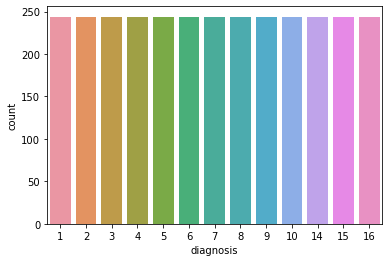

In [18]:
sns.countplot(y_res,data=df)
y_res.value_counts()

1     244
10     50
2      39
6      25
16     21
3      15
4      14
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

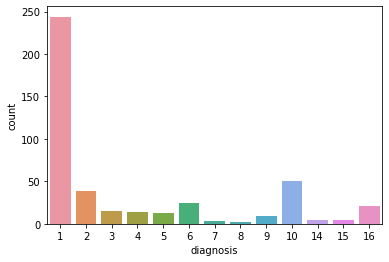

In [19]:
sns.countplot(x='diagnosis',data=df)
df['diagnosis'].value_counts()

In [20]:
y_train_df

0       8
1       6
2      10
3       1
4       7
       ..
439     1
440    10
441     2
442     1
443     1
Name: diagnosis, Length: 444, dtype: int64

In [21]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
#regr.fit(x_poly, y)
#y_poly_pred=model.predict(x_poly)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

y_pred=regr.predict(X)
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

NameError: name 'X' is not defined

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)



In [23]:
df.isnull().any().any()


False

In [24]:
from sklearn import feature_selection

sel = feature_selection.VarianceThreshold()
train_variance = sel.fit_transform(df)
train_variance.shape

(444, 170)

In [25]:
corr_matrix = df.corr().abs()
print(corr_matrix['diagnosis'].sort_values(ascending=False).head(10))

diagnosis       1.000000
DB              0.376509
qrs_duration    0.322112
DD              0.321046
DN              0.269910
IV              0.239344
JH              0.208650
s_wave          0.203718
GF              0.203106
AJ              0.193021
Name: diagnosis, dtype: float64


In [26]:
# Find index of feature columns with high correlation
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.50)]
print('Columns to drop: ' , (len(to_drop)))

Columns to drop:  170


In [27]:
from sklearn.decomposition import PCA
# pca - keep 90% of variance
pca = PCA(0.9)
principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data = principal_components)
print(principal_df.shape)


(444, 44)


In [28]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data

# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train_df, y_train_df)
print(model.feature_importances_)
len(model.feature_importances_)
type(model.feature_importances_)


[0.00589639 0.00733769 0.00548096 0.00476058 0.00810313 0.00556413
 0.00888753 0.00798671 0.0061296  0.00470301 0.00976829 0.00393316
 0.00608979 0.02489422 0.00224419 0.00479899 0.00806816 0.00447402
 0.00507444 0.00514688 0.00602839 0.00135389 0.00410285 0.00545528
 0.00421469 0.00362797 0.00187502 0.00427936 0.00584853 0.00524695
 0.00266966 0.00127377 0.0041504  0.00207043 0.00491422 0.00424034
 0.00039596 0.00542555 0.00737846 0.00441231 0.00361199 0.00017323
 0.00508496 0.00400895 0.0046808  0.00631232 0.03179805 0.02621605
 0.00799261 0.00616581 0.00765586 0.01167637 0.00714255 0.01192266
 0.00832248 0.01249222 0.00783794 0.00352513 0.00626564 0.00577937
 0.00643049 0.00483004 0.00604123 0.0045176  0.00571145 0.00411865
 0.00847752 0.00338454 0.00518256 0.00497284 0.00325577 0.00340315
 0.00569136 0.00500051 0.00997209 0.00478116 0.00508662 0.00584279
 0.00875609 0.00487231 0.00525556 0.00598889 0.01033987 0.00492548
 0.00561334 0.00513948 0.00737032 0.0044897  0.00332165 0.0019

numpy.ndarray

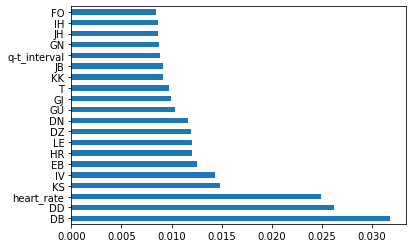

In [29]:
feat_importances = pd.Series(model.feature_importances_, index=X_train_df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif
# feature extraction
k_best = SelectKBest(score_func=f_classif, k=100)
# fit on train set
fit = k_best.fit(X_train, y_train_df)
# transform train set
univariate_features = fit.transform(X_train)

In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [32]:
plt.figure(figsize=(12,10))
cor = df.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

<Figure size 864x720 with 0 Axes>

In [33]:
cor

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KU,KV,KY,KZ,LA,LD,LE,LF,LG,diagnosis
age,1.000000,-0.064510,-0.108901,0.376976,0.002187,0.036578,0.189989,0.030014,0.091940,-0.262909,...,-0.219756,-0.220995,0.161923,-0.153478,0.083195,-0.039437,-0.267128,0.024035,-0.191449,-0.087289
sex,-0.064510,1.000000,-0.122030,-0.251161,-0.338305,-0.047114,0.064703,-0.175283,-0.085680,0.073653,...,-0.019223,-0.015653,0.227526,-0.034185,0.097306,0.010321,0.062055,0.038768,0.049239,-0.175850
height,-0.108901,-0.122030,1.000000,-0.075263,-0.006731,0.013715,-0.238489,-0.042143,0.030421,0.060880,...,-0.043540,0.131458,-0.018134,-0.076027,-0.091648,0.068608,-0.008324,-0.091939,-0.093352,0.006308
weight,0.376976,-0.251161,-0.075263,1.000000,0.105701,0.115513,0.122775,0.152347,0.114067,-0.169410,...,-0.086545,-0.126433,0.047369,-0.020901,0.052912,-0.043515,-0.142251,0.068780,-0.043704,-0.088185
qrs_duration,0.002187,-0.338305,-0.006731,0.105701,1.000000,0.025729,0.224509,0.400186,0.055617,-0.149106,...,-0.067620,-0.259806,-0.197775,0.088888,-0.230565,-0.063223,-0.229020,0.128362,-0.087837,0.322112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LD,-0.039437,0.010321,0.068608,-0.043515,-0.063223,0.148040,-0.042006,0.053089,0.253799,0.081671,...,-0.158034,0.027135,-0.114934,-0.000407,-0.093602,1.000000,-0.051318,-0.068782,-0.067515,-0.075216
LE,-0.267128,0.062055,-0.008324,-0.142251,-0.229020,0.071362,-0.024923,-0.182955,0.027031,0.065284,...,0.618600,0.536328,0.098166,0.110296,-0.068741,-0.051318,1.000000,-0.117883,0.691233,-0.022157
LF,0.024035,0.038768,-0.091939,0.068780,0.128362,-0.030856,0.260713,0.126982,-0.019236,0.293565,...,0.546013,-0.581156,0.035529,0.664243,0.562399,-0.068782,-0.117883,1.000000,0.612481,-0.011015
LG,-0.191449,0.049239,-0.093352,-0.043704,-0.087837,0.024763,0.163207,-0.015277,0.009122,0.252218,...,0.881515,0.008203,0.095904,0.563203,0.342416,-0.067515,0.691233,0.612481,1.000000,-0.014823


In [34]:
#Correlation with output variable
cor_target = abs(cor["diagnosis"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

diagnosis    1.0
Name: diagnosis, dtype: float64

In [35]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
# generate dataset
X_train,y_train_df = make_classification(n_samples=444, n_features=20, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=20)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train_df)
print(X_selected.shape)
fs

(444, 20)


SelectKBest(k=20, score_func=<function f_classif at 0x00000261BAE27D38>)

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_df,y_train_df)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [37]:
print(model.feature_importances_)

[0.00821173 0.00808511 0.00689733 0.00912557 0.00665574 0.00612841
 0.00780338 0.00714859 0.00856818 0.00498543 0.00530623 0.00557986
 0.00499928 0.00739238 0.00459402 0.00676496 0.00554944 0.0067191
 0.00401825 0.00778237 0.00722661 0.00160321 0.00577999 0.00529469
 0.00702554 0.00522253 0.00304246 0.00781899 0.0065784  0.00886627
 0.00255229 0.00208283 0.00669086 0.00559236 0.00645892 0.00610472
 0.00187974 0.00712392 0.00452969 0.00597461 0.00554418 0.00513248
 0.00908179 0.00467759 0.0057491  0.00570674 0.00389832 0.0074061
 0.00299084 0.00609705 0.00662728 0.00272043 0.00612454 0.00166355
 0.00584961 0.00592858 0.00613915 0.00422605 0.0088788  0.00748054
 0.00540403 0.00410273 0.0072157  0.00641248 0.00698659 0.00441068
 0.00684178 0.00609662 0.00741557 0.0068318  0.00546967 0.0077482
 0.00816454 0.00593423 0.00596726 0.00555963 0.00585009 0.00776159
 0.00400054 0.00703511 0.00603862 0.00641825 0.00600343 0.00559875
 0.005968   0.00715844 0.00463436 0.00554566 0.00492647 0.0018709

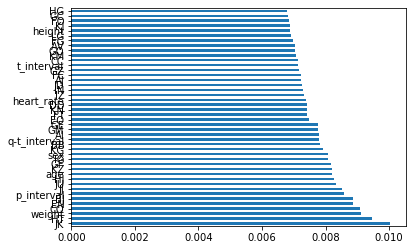

age             0.008212
sex             0.008085
height          0.006897
weight          0.009126
qrs_duration    0.006656
                  ...   
LA              0.006264
LD              0.006170
LE              0.006255
LF              0.006507
LG              0.006920
Length: 169, dtype: float64

In [38]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train_df.columns)
feat_importances.nlargest(44).plot(kind='barh')
plt.show()
feat_importances.nlargest(44)
feat_importances

In [39]:

sklearn.feature_selection.f_classif(X_train_df, y_train_df)

(array([ 4.10472426e-01,  1.53743877e+00,  1.29049834e+00,  1.60276142e+00,
         2.12265808e+00,  1.72774491e+00,  4.22449313e-01,  1.42368576e-01,
         1.10975556e-01,  8.83808293e-01,  1.07000343e+00,  3.59729758e-01,
         8.61457217e-01,  2.75845429e-01,  6.13473299e-02,  7.74181333e-01,
         6.88483847e-03,  1.72455803e-02,  8.18891076e-02,  1.05078940e+00,
         1.29275392e-03,  1.81011283e-01,  7.50939628e-02,  1.06951040e+00,
         3.88098872e-01,  1.62707313e+00,  8.16626636e-02,  9.31854823e-01,
         1.46842368e+00,  8.81937535e-01,  1.86597726e+00,  4.55077922e-01,
         2.13236423e-01,  6.78015050e-01,  8.10876513e-01,  6.87667939e-01,
         2.10646156e-01,  4.65931903e-01,  5.35611169e-01,  2.55415991e-01,
         7.22230675e-02,  4.34716288e+00,  1.73339711e+00,  2.07565501e+00,
         2.22951818e-02,  4.65217075e-01,  1.17119129e+00,  2.87732665e-01,
         3.19085221e-01,  6.37819590e-01,  2.60067312e-02,  1.30662922e-01,
         3.4

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [41]:
X_train1, X_test, y_train1, y_test = train_test_split(
        X_train_df, y_train_df, stratify=y_train_df, random_state=0
)

In [42]:
X_indices = np.arange(X_train_df.shape[-1])

In [43]:
selector = SelectKBest(f_classif, k=10)
fit=selector.fit(X_train1, y_train1)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_df.columns)

scores

array([0.00137677, 0.40708592, 0.39301685, 0.24648169, 0.45420413,
       0.11762956, 0.34741273, 0.17691004, 0.23247334, 0.08739127,
       0.40308738, 0.01422415, 0.08268003, 0.10409017, 0.13249155,
       0.17126825, 0.06026244, 0.15975271, 0.05381517, 0.01871825,
       0.06883978, 0.67683601, 0.3693293 , 0.0573272 , 0.05159102,
       0.34928653, 0.02134378, 0.31213862, 0.15003412, 0.20437993,
       0.2087472 , 0.04215438, 0.08090114, 0.08598435, 0.32192013,
       0.17360198, 0.2266432 , 0.07093579, 0.04410493, 0.14674824,
       0.05466289, 0.81489836, 0.56188039, 0.4740049 , 0.05118445,
       0.1020895 , 0.25944319, 0.20639387, 0.08701765, 0.04773331,
       0.05346891, 0.01352281, 0.01650427, 0.131122  , 0.04771974,
       0.21658923, 0.03976134, 0.47063827, 0.17504726, 0.97127481,
       0.11151694, 0.02941124, 0.19784229, 0.00501971, 0.28486736,
       0.16478559, 0.03864713, 0.03168071, 0.08881842, 0.50686562,
       0.07554712, 0.34774439, 0.09614817, 0.48889153, 0.03272

In [44]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe 

In [45]:
featureScores

,Specs,Score
0,age,0.000044
1,sex,1.595511
2,height,1.516540
3,weight,0.754083
4,qrs_duration,1.865640
...,...,...
164,LA,1.331081
165,LD,0.167800
166,LE,0.069402
167,LF,0.076027


In [46]:
print(featureScores.nlargest(44,'Score'))  

            Specs     Score
94             HJ  5.379347
59             EO  5.182913
41             CM  4.130841
77             GM  3.797092
111            IG  3.561200
21             AK  3.231444
141            JU  3.166617
133            JJ  2.970937
42             CO  2.510374
148            KD  2.249461
69             GC  2.176662
156            KN  2.104191
73             GI  2.069514
43             CY  1.981533
57             EM  1.961736
4    qrs_duration  1.865640
146            KB  1.725777
123            IV  1.652759
1             sex  1.595511
10              T  1.572984
2          height  1.516540
22             AM  1.385512
164            LA  1.331081
25             AY  1.276674
71             GE  1.268382
6    q-t_interval  1.266600
34             BY  1.131356
27             BB  1.080407
138            JO  0.941446
64             FG  0.941375
89             HD  0.819701
46             DB  0.816137
3          weight  0.754083
8      p_interval  0.688496
79             GO  0

In [47]:
#govinda govinda


In [48]:
from collections import Counter
counter = Counter(y_train_df)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

NameError: name 'y' is not defined

<Figure size 1080x1440 with 0 Axes>

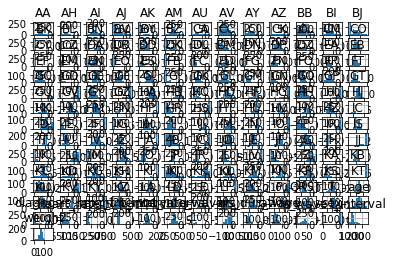

In [49]:
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline
# we can use this to get the spread of variance ..but can we get the plot a bit bigger???
# create a histogram plot of each variable
# df.hist()
# show the plot
# df.figure(figsize=(15,15))
# plt.show()
fig = plt.figure(figsize = (15,20))
df.hist()
plt.show()

In [50]:
out=df.var()

In [51]:
out.nlargest(44)

T               3347.577629
qrs             2091.228215
p-r_interval    2033.665101
JZ              1410.706912
height          1405.170942
QRST            1308.278978
t_interval      1273.497143
KJ              1180.647101
q-t_interval    1102.297048
JY              1048.251681
P                826.078563
BN               780.048238
CY               724.261526
JM               712.679345
p_interval       670.903484
JL               667.444622
AY               648.539564
KI               633.929912
BI               621.067578
KU               595.953495
DA               572.207675
JB               571.511468
CL               542.223659
AV               535.576516
BZ               534.188681
BY               518.136701
FP               498.088870
AU               477.214976
DK               447.551868
AJ               445.000956
JC               441.972869
s_wave           423.012873
CK               410.720029
DD               364.616680
LG               342.890457
BK               342

In [52]:
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable to have the classes 0 and 1
	y = LabelEncoder().fit_transform(y)
	return X, y

In [53]:
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [58]:
from sklearn.preprocessing import LabelEncoder
full_path = 'new_dataframe_3.csv'
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))

(445, 19) (445,) Counter({0: 244, 1: 50, 5: 39, 9: 25, 4: 21, 6: 15, 7: 14, 8: 13, 12: 9, 3: 5, 2: 4, 10: 3, 11: 2, 13: 1})


In [59]:
from sklearn.dummy import DummyClassifier
# define the reference model
model = DummyClassifier(strategy='most_frequent')

In [60]:
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
 
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean Accuracy: 0.548 (0.004)


In [61]:
#This score provides a baseline on this dataset by which all other classification algorithms can be compared. Achieving a score above about 54.8 percent indicates that a model has skill on this dataset, and a score at or below this value indicates that the model does not have skill on this dataset.

In [62]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
 

In [63]:
def load_dataset(full_path):
    data = read_csv(full_path)
    data = data.values
    X, y = data[:, :-1], data[:, -1]
    #onehot_encoder = OneHotEncoder()
    #y = onehot_encoder.fit_transform(y).toarray()
    
    #y = OneHotEncoder().fit_transform(y)
    #y = y.reshape(len(y), 1)
    #y1 = onehot_encoder.fit_transform(y)
    
    #y.reshape(-1, 1)
    return X, y
 
#     from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder(categorical_features = [0])
# x = onehotencoder.fit_transform(x).toarray()


In [64]:
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=45)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 


In [65]:
# define models to test
def get_models():
	models, names = list(), list()
	# SVM
	models.append(SVC(gamma='auto'))
	names.append('SVM')
	# KNN
	models.append(KNeighborsClassifier())
	names.append('KNN')
	# Bagging
	models.append(BaggingClassifier(n_estimators=1000))
	names.append('BAG')
	# RF
	models.append(RandomForestClassifier(n_estimators=1000))
	names.append('RF')
	# ET
	models.append(ExtraTreesClassifier(n_estimators=1000))
	names.append('ET')
	return models, names
 


c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


>SVM 0.915 (0.019)
>KNN 0.625 (0.014)


c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_spl

>BAG 0.932 (0.023)


c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


>RF 0.936 (0.024)


c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


>ET 0.932 (0.024)


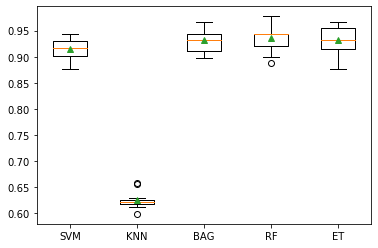

In [91]:
# define the location of the dataset
full_path = 'new_dataframe_2.csv'
# load the dataset
X, y = load_dataset(full_path)
X.shape
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(X, y, models[i])
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [2]:
#wow beauttttttttttttttttttttt wooowww...i ll call u now 
# explain y knn is so loww nu

In [68]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


In [69]:
# load dataset
# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y)
# encoded_Y = encoder.transform(y)
# # convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)
 
# dummy_y
dummy_y.shape



(444, 17)

In [70]:
# define baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=19, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(17, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [71]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=32, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Baseline: 52.02% (10.24%)


In [72]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X, y = make_classification(n_samples=444, n_features=169, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=20)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
print(X.shape)

(444, 20)
(444, 169)


In [73]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=444,
                           n_features=20,
                           n_informative=8,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=16,
                           random_state=0,
                           shuffle=False)



In [74]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]



Feature ranking:
1. feature 6 (0.062868)
2. feature 2 (0.062336)
3. feature 1 (0.059490)
4. feature 5 (0.058629)
5. feature 4 (0.056099)
6. feature 0 (0.055359)
7. feature 7 (0.053616)
8. feature 3 (0.052032)
9. feature 9 (0.046457)
10. feature 14 (0.045781)
11. feature 8 (0.045440)
12. feature 17 (0.045191)
13. feature 13 (0.045144)
14. feature 15 (0.045078)
15. feature 11 (0.044811)
16. feature 12 (0.044776)
17. feature 18 (0.044711)
18. feature 16 (0.044410)
19. feature 19 (0.043920)
20. feature 10 (0.043852)


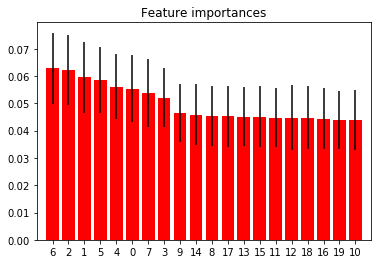

In [75]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [76]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification



In [77]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=444, n_features=169, n_informative=20,
                           n_redundant=2, n_repeated=0, n_classes=16,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)



RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma='scale', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

Optimal number of features : 25


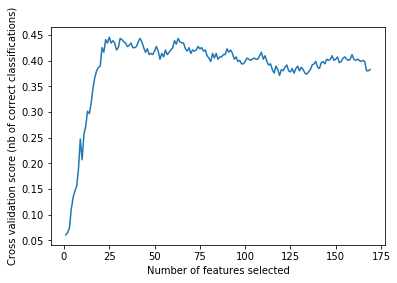

In [78]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [79]:
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
 
scores = evaluate_model(X_selected, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.068 (0.000)


In [80]:
scores = evaluate_model(X_selected, y, model)

In [81]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.068 (0.000)


In [82]:
importances = forest.feature_importances_

In [83]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.00581526 0.00543954 0.00795334 0.00463433 0.00567666 0.00540561
 0.00864243 0.00511775 0.00485121 0.0089426  0.00536864 0.00492592
 0.00482571 0.00633345 0.00594038 0.00636983 0.00573005 0.00506087
 0.00493184 0.00588304 0.00539723 0.00626545 0.0057354  0.00546497
 0.00562279 0.00597839 0.00791065 0.0059301  0.00569017 0.00537159
 0.00428297 0.00548192 0.00501902 0.00607196 0.00504083 0.00485726
 0.00599596 0.0050342  0.00520985 0.00506547 0.00608979 0.00434954
 0.00895771 0.00556911 0.00572178 0.00533428 0.00523514 0.00546478
 0.00612721 0.00503269 0.00880704 0.0044855  0.0047612  0.00933495
 0.00515885 0.00682266 0.00522148 0.00588078 0.00446136 0.00506208
 0.00663633 0.00545038 0.00516185 0.00549298 0.00679894 0.00615999
 0.00525955 0.00580194 0.00547098 0.00560442 0.00586688 0.00598872
 0.00525634 0.00549295 0.00538668 0.00557956 0.00629029 0.00449864
 0.00576003 0.00503082 0.01042537 0.00584006 0.00587937 0.00567183
 0.00618858 0.00514338 0.00582753 0.00558591 0.0053144  0.0052

In [84]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False False False  True
  True False False False False False False False False False  True False
 False False False False False False False  True False False False False
  True False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [28]:
# 8, 18, 20, 23,24,27, 30, 34, 42, 50, 62, 75, 78, 87, 92, 100, 106, 113, 127, 153, 157

In [90]:
%%time

import xgboost as xgb

pl_xgb = Pipeline(steps=
                  [('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])
scores = cross_val_score(pl_xgb, X, y, cv=5)
print('Accuracy for XGBoost Classifier : ', scores.mean())

c:\users\esettvx\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy for XGBoost Classifier :  0.7342185903983657
Wall time: 5.79 s
